# Graphs

In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    """Agent状态定义"""
    foo: str = "test_foo"
    bar: list[str] = ["test_bar"]

多结构 schemas

In [2]:
from langgraph.graph import StateGraph, START, END

class InputState(TypedDict):
    """Agent输入状态定义"""
    user_input: str

class OutputState(TypedDict):
    """Agent输出状态定义"""
    graph_output: str
    
class OverallState(TypedDict):
    """"""
    foo: str
    user_input: str
    graph_output: str
    
class PrivateState(TypedDict):
    bar: str
    
def node_1(state: InputState) -> OverallState:
    return {"foo": state["user_input"] + " name"}

def node_2(state: OutputState) -> PrivateState:
    return {"bar": state["foo"] + " is"}

def node_3(state: PrivateState) -> OutputState:
    return {"graph_output": state["bar"] + " Lance"}

builder = StateGraph(OverallState, input_shema=InputState, output_schema=OutputState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)
graph = builder.compile()

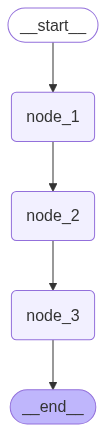

In [3]:
# 输出图
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

# png_data = graph.get_graph().draw_mermaid_png()
# with open("graph.png", "wb") as f:
#     f.write(png_data)

State创建示例

In [9]:
# example 1
from typing_extensions import TypedDict

class State(TypedDict):
    foo: str
    bar: list[str]

state = State(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(state["bar"])}\n state: {state}")

bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}


In [ ]:
# example 2
from typing import Annotated
from typing_extensions import TypedDict
# or
# from typing import TypedDict
from operator import add

class State(TypedDict):
    foo: str
    bar: Annotated[list[str], add]

state = State(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(state["bar"])}\n state: {state}")


bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}


In [15]:
# 更改数据
state["foo"] = "mod_foo"
state["bar"] = ["mod_bar"]
print(state)

{'foo': 'mod_foo', 'bar': ['mod_bar']}


In [ ]:
# 非 State 状态定义
class test_state():
    def __init__(self, foo: str, bar: list[str]) -> None:
        self.foo = foo
        self.bar = bar

ts = test_state(foo="test_foo", bar=["test_bar"])
print(f"bar type: {type(ts.bar)}\n state: {ts.__dict__}")

# 若更改数据
ts.foo = "mod_foo"
ts.bar.append("mod_bar")
print(f"{ts.foo}\n{ts.bar}")

bar type: <class 'list'>
 state: {'foo': 'test_foo', 'bar': ['test_bar']}
mod_foo
['test_bar', 'mod_bar']


注意到和 TypedDict 定义的区别了吗？
1. 数据引用，TypedDict 采用[""] 方式访问，类采用 `.` 方式访问
2. `.` 类访问方式更改 `str` 不起作用